# Lab | Random Forests

Importing libraries.

In [2]:
import pandas as pd

Reading file.

In [3]:
numerical = pd.read_csv('files_for_lab/numerical.csv')
categorical = pd.read_csv('files_for_lab/categorical.csv')
target = pd.read_csv('files_for_lab/target.csv')

Nulls in numerical dataset

In [4]:
list(numerical.isna().sum() > 0 )

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [51]:
from sklearn.preprocessing import MinMaxScaler

num_norm = MinMaxScaler().fit_transform(numerical.select_dtypes('int64'))
num_norm = pd.DataFrame(num_norm, columns=numerical.select_dtypes('int64').columns)

Categorical dataset.

In [5]:
categorical.columns

Index(['STATE', 'CLUSTER', 'HOMEOWNR', 'GENDER', 'DATASRCE', 'RFA_2R',
       'RFA_2A', 'GEOCODE2', 'DOMAIN_A', 'DOMAIN_B', 'ODATEW_YR', 'ODATEW_MM',
       'DOB_YR', 'DOB_MM', 'MINRDATE_YR', 'MINRDATE_MM', 'MAXRDATE_YR',
       'MAXRDATE_MM', 'LASTDATE_YR', 'LASTDATE_MM', 'FIRSTDATE_YR',
       'FIRSTDATE_MM'],
      dtype='object')

In [6]:
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [7]:
categorical['STATE'].value_counts(dropna=False)

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

In [8]:
categorical['HOMEOWNR'].value_counts(dropna=False)

H    74582
U    20830
Name: HOMEOWNR, dtype: int64

In [9]:
categorical['GENDER'].value_counts(dropna=False)

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [10]:
categorical['RFA_2R'].value_counts(dropna=False)

L    95412
Name: RFA_2R, dtype: int64

In [11]:
categorical['RFA_2A'].value_counts(dropna=False)

F    46964
E    21639
G    19397
D     7412
Name: RFA_2A, dtype: int64

In [12]:
categorical['GEOCODE2'].value_counts(dropna=False)

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [13]:
categorical['DOMAIN_A'].value_counts(dropna=False)

R    22106
S    21924
C    19689
T    19527
U    12166
Name: DOMAIN_A, dtype: int64

categorical['RFA_2R'] will be dropped as it has only one option.

In [14]:
categorical.drop(['RFA_2R'], axis=1, inplace=True)

Encoding categorical columns that have type 'object'.

In [15]:
cat_oht = categorical.select_dtypes('object')

In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
encoder.fit(cat_oht)

cat_enc = encoder.transform(cat_oht).toarray()
cat_enc = pd.DataFrame(cat_enc, columns = encoder.get_feature_names_out())

In [17]:
cat_enc

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
95408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95409,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
95410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Scaling the other categorical columns that have numbers

In [18]:
cat_norm = MinMaxScaler().fit_transform(categorical.select_dtypes('int64'))
cat_norm = pd.DataFrame(cat_norm, columns=categorical.select_dtypes('int64').columns)

Concatenating both categorical datasets

In [19]:
cat_final = pd.concat([cat_norm,cat_enc], axis=1)

In [20]:
cat_final

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.673077,1.0,0.333333,0.428571,0.0,0.381443,1.000000,0.772727,0.636364,0.863636,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.250000,1.0,0.000000,0.785714,0.0,0.536082,0.090909,0.818182,0.818182,0.909091,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.807692,1.0,0.333333,0.500000,0.0,0.000000,0.090909,0.727273,0.909091,0.772727,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.826923,1.0,0.333333,0.285714,0.0,0.288660,0.000000,0.545455,0.909091,0.863636,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.288462,1.0,0.333333,0.214286,0.0,0.206186,0.000000,0.818182,0.818182,0.954545,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.500000,1.0,0.333333,0.928571,0.0,0.000000,0.090909,0.954545,0.090909,0.954545,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
95408,0.442308,1.0,0.000000,0.928571,0.0,0.515464,0.000000,0.954545,0.181818,0.954545,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95409,0.557692,1.0,0.666667,0.857143,0.0,0.391753,0.000000,0.954545,0.181818,0.909091,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
95410,0.442308,0.5,0.000000,0.214286,0.0,0.412371,0.363636,0.681818,0.909091,0.954545,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Concatenating numerical and categorical datasets

In [52]:
x = pd.concat([num_norm, cat_final], axis=1)

In [37]:
target

,TARGET_B,TARGET_D,tb
0,0,0.0,no
1,0,0.0,no
2,0,0.0,no
3,0,0.0,no
4,0,0.0,no
...,...,...,...
95407,0,0.0,no
95408,0,0.0,no
95409,0,0.0,no
95410,1,18.0,yes


In [34]:
target['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [36]:
target['tb'] = ['yes' if x == 1 else 'no' for x in target['TARGET_B']]

Imbalaced data.

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,target['tb'], test_size=0.3, random_state=100) 

In [58]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100,k_neighbors=3)

x_train_SMOTE,y_train_SMOTE = sm.fit_resample(x_train,y_train)

In [59]:
y_train_SMOTE.value_counts()

no     63396
yes    63396
Name: tb, dtype: int64

Apply the Random Forests algorithm but this time only by upscaling the data.

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(x_train_SMOTE, y_train_SMOTE)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(x_train_SMOTE, y_train_SMOTE)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(x_test, y_test)))

y_pred = clf.predict(x_test)
display(y_test.value_counts())

The R2 for the Random Forest in the TRAIN set is 0.87
The R2 for the Random Forest in the TEST  set is 0.83


no     27173
yes     1451
Name: tb, dtype: int64

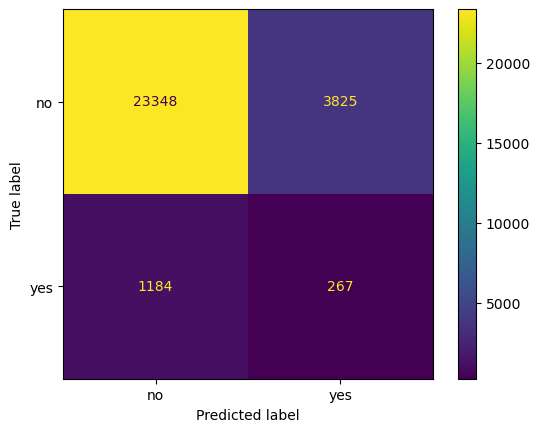

In [61]:
cm_test = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=clf.classes_);
disp.plot()

Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative?

In [66]:
target.groupby(['tb']).agg({'TARGET_D':'mean'})

,TARGET_D
tb,
no,0.000000
yes,15.624344


In [67]:
target.groupby(['tb']).agg({'TARGET_D':'median'})

,TARGET_D
tb,
no,0.0
yes,13.0


As the average donation is 15.62 and the median is 13, a false negative is more costly than a false positive, as the donation is usually higher than the cost of sending the envelope (Assuming sending the envelope is < 1).

Sklearn classification models are trained to maximize the accuracy. However, another error metric will be more relevant here. Please checkout make_scorer alogside with GridSearchCV in order to train the model to maximize the error metrics of interest in this case.

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import cohen_kappa_score

grid = {'max_depth': [5,10], #
        'criterion': ['gini','entropy'], 
        'min_samples_split': [20],
        'min_samples_leaf': [20]}


model = RandomForestClassifier()


grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5, scoring=make_scorer(cohen_kappa_score))

grid_search.fit(x_train_SMOTE, y_train_SMOTE)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'min_samples_leaf': [20], 'min_samples_split': [20]},
             scoring=make_scorer(cohen_kappa_score))

In [88]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 20}
0.9161940912871878


In [89]:
rfc = RandomForestClassifier(max_depth=10, criterion='gini', min_samples_split =20,
        min_samples_leaf =20)
rfc.fit(x_train_SMOTE, y_train_SMOTE)

y_pred = rfc.predict(x_test)
display(y_test.value_counts())

no     27173
yes     1451
Name: tb, dtype: int64

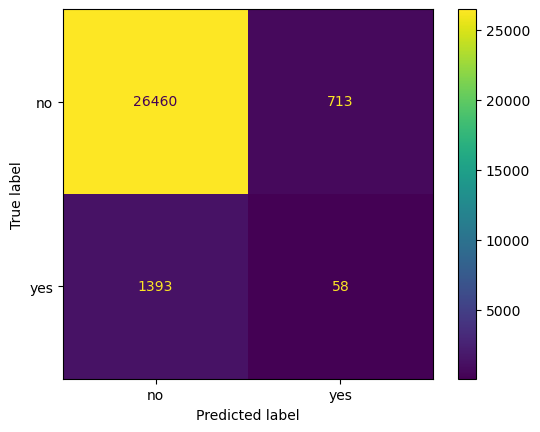

In [90]:
cm_test = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=clf.classes_);
disp.plot()